In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [3]:
rain_june = np.array([  66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])

rain_november = np.array([  83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8])

In [2]:
def permutation_sample(data1, data2):
    
    data = np.concatenate((data1, data2))
    permutated_data = np.random.permutation(data)
    
    perm_sample1 = permutated_data[len(data1):]
    perm_sample2 = permutated_data[:len(data1)]
    
    return perm_sample1, perm_sample2

### Visualizing permutation sampling

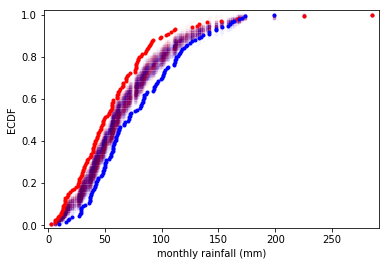

In [9]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june) 
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

## Hypothesis Testing 
<ul>
    <li>Assesment of how reasonable the observed data are assuming a hypothesis is true</li>
</ul>

But how do we quantify the assesment?

## Test Statistics
<ul>
    <li>A number that can be computed from observed data and from data you simulate under the null hypothesis</li>
    <li>It serves as a basis of comparison between the two</li>
</ul>

## P-Value
The probability of observing a test statistics equally or more extreme than the one you observed, give that the null hypothesis is true

In [10]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [11]:
force_a = np.array([ 1.612,  0.605,  0.327,  0.946,  0.541,  1.539,  0.529,  0.628,
        1.453,  0.297,  0.703,  0.269,  0.751,  0.245,  1.182,  0.515,
        0.435,  0.383,  0.457,  0.73 ])
force_b = np.array([ 0.172,  0.142,  0.037,  0.453,  0.355,  0.022,  0.502,  0.273,
        0.72 ,  0.582,  0.198,  0.198,  0.597,  0.516,  0.815,  0.402,
        0.605,  0.711,  0.614,  0.468])

In [17]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


p-value = 0.0061


<font size=4>The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant,", but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!</font>

# Bootstrap Hypothesis Tests

## Pipeline for hypothesis testing
<ul>
    <li>Clearly state the null hypothesis</li>
    <li>Define your test statistic</li>
    <li>Generate many sets of simulated data assuming the null hypothesis is true</li>
    <li>Compute the test statistic for each simulated data set</li>
    <li>The p-value is the fraction for you simulated data set which the test statistic is at least as extreme as for the real data</li>
</ul>

In [21]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


In [23]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0062


## A bootstrap test for identical distributions


In [24]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a, force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))

    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0055


In [25]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0049


<font size=4>
    Not surprisingly, the more forgiving hypothesis, only that the means are equal as opposed to having identical distributions, gives a higher p-value. Again, it is important to carefully think about what question you want to ask. Are you only interested in the mean impact force, or the distribution of impact forces?</font>